In [46]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [47]:
oversampled_data_2001 = pd.read_csv('oversampled_data_2001_AllVariables.csv')
oversampled_data_2009 = pd.read_csv('oversampled_data_2009_AllVariables.csv')
oversampled_data_2017 = pd.read_csv('oversampled_data_2017_AllVariables.csv')

In [48]:
school_2009 = oversampled_data_2009.copy()
school_2017 = oversampled_data_2017.copy()

In [49]:
oversampled_data_2009.columns

Index(['HOUSEID', 'PERSONID', 'DRIVER', 'HHFAMINC', 'TRIPPURP', 'R_AGE',
       'URBRUR', 'WHYFROM', 'WHYTO', 'WHYTRP1S', 'WRKCOUNT', 'CNTTDTR',
       'DELIVER', 'DISTTOSC', 'GCDWORK', 'GRADE', 'NBIKETRP', 'NWALKTRP',
       'PURCHASE', 'SCHTRN1', 'SCHTRN2', 'TIMETOSC', 'TIMETOWK', 'WEBUSE',
       'WKFMHMXX', 'WRKTRANS', 'DISTTOWK', 'HHSIZE', 'HHFAMINC2'],
      dtype='object')

In [50]:
oversampled_data_2017.columns

Index(['HOUSEID', 'PERSONID', 'WHYFROM', 'TRIPPURP', 'WHYTRP1S', 'WHYTO',
       'HHFAMINC', 'WRKCOUNT', 'URBRUR', 'R_AGE', 'DRIVER', 'WRKTRANS',
       'NWALKTRP', 'NBIKETRP', 'CARSHARE', 'TIMETOWK', 'WKFMHMXX', 'SCHTRN1',
       'SCHTRN2', 'DELIVER', 'CNTTDTR', 'GCDWORK', 'DISTTOWK', 'DISTTOSC',
       'BIKE', 'CAR', 'BUS', 'TRAIN', 'WEBUSE', 'HHSIZE', 'WEBUSE.1',
       'HHFAMINC2'],
      dtype='object')

In [51]:
# Mapping for HHFAMINC2 column
income_labels = {0: 'Low Income', 1: 'Medium Income', 2: 'High Income'}
oversampled_data_2001['HHFAMINC2'] = oversampled_data_2001['HHFAMINC2'].map(income_labels)
oversampled_data_2009['HHFAMINC2'] = oversampled_data_2009['HHFAMINC2'].map(income_labels)
oversampled_data_2017['HHFAMINC2'] = oversampled_data_2017['HHFAMINC2'].map(income_labels)

# Mapping for WRKTRANS column
wrktrans_mapping_2001 = {
    0: 'Car', 1: 'Skip', 2: 'Other', 3: 'SUV', 4: 'Walk', 5: 'Van', 6: 'PickupTruck', 7: 'OtherTruck',
    8: 'Motorcycle', 9: 'LocalBus', 10: 'CommuterTrain', 11: 'NotAscertained', 12: 'Bicycle', 13: 'Subway',
    14: 'DontKnow', 15: 'AmtrackTrain'
}

wrktrans_mapping_2009 = {
    0: 'Skip', 1: 'Car', 2: 'PickupTruck', 3: 'SUV', 4: 'Other', 5: 'DontKnow', 6: 'Van', 7: 'Walk',
    8: 'CommuterTrain', 9: 'LocalBus', 10: 'Airplane', 11: 'Bicycle', 12: 'Motorcycle', 13: 'OtherTruck',
    14: 'AmtrackTrain', 15: 'SchoolBus', 16: 'Subway', 17: 'Refused', 18: 'LightEV', 19: 'CommuterBus',
    20: 'SpecialTransitDisabilities', 21: 'ShuttleBus', 22: 'TaxiCab', 23: 'CharterBus'
}

wrktrans_mapping_2017 = {
    0: 'Skip', 1: 'Car', 2: 'SUV', 3: 'NotAscertained', 4: 'CommuterBus', 5: 'Van', 6: 'Motorcycle',
    7: 'PickupTruck', 8: 'Bicycle', 9: 'Walk', 10: 'Other', 11: 'AmtrackTrain', 12: 'Airplane', 13: 'TaxiCab',
    14: 'DontKnow'
}

oversampled_data_2001['WRKTRANS'] = oversampled_data_2001['WRKTRANS'].map(wrktrans_mapping_2001)
oversampled_data_2009['WRKTRANS'] = oversampled_data_2009['WRKTRANS'].map(wrktrans_mapping_2009)
oversampled_data_2017['WRKTRANS'] = oversampled_data_2017['WRKTRANS'].map(wrktrans_mapping_2017)

In [52]:
# For oversampled_data_2001
filter_values_2001 = ['Skip', 'DontKnow', 'NotAscertained']
oversampled_data_2001_filtered = oversampled_data_2001[~oversampled_data_2001['WRKTRANS'].isin(filter_values_2001)]

# For oversampled_data_2009
filter_values_2009 = ['Skip', 'DontKnow', 'Refused']
oversampled_data_2009_filtered = oversampled_data_2009[~oversampled_data_2009['WRKTRANS'].isin(filter_values_2009)]

# For oversampled_data_2017
filter_values_2017 = ['Skip', 'NotAscertained', 'DontKnow']
oversampled_data_2017_filtered = oversampled_data_2017[~oversampled_data_2017['WRKTRANS'].isin(filter_values_2017)]

In [53]:
work_mode = oversampled_data_2017_filtered[['WRKTRANS', 'HHFAMINC2']]

In [54]:
work_mode[:5]

,WRKTRANS,HHFAMINC2
37,Car,High Income
38,Car,High Income
39,Car,High Income
40,Car,High Income
41,Car,High Income


In [55]:
# Grouping by 'HHFAMINC2' and 'WRKTRANS' and counting occurrences
summary = work_mode.groupby(['HHFAMINC2', 'WRKTRANS']).size().reset_index(name='Count')
summary = summary.rename(columns={'HHFAMINC2': 'group', 'WRKTRANS': 'name', 'Count': 'value'})


In [56]:
summary[:10]

,group,name,value
0,High Income,Airplane,9
1,High Income,AmtrackTrain,4
2,High Income,Bicycle,14
3,High Income,Car,1261
4,High Income,CommuterBus,4
5,High Income,Motorcycle,13
6,High Income,Other,11
7,High Income,PickupTruck,158
8,High Income,SUV,397
9,High Income,Van,40


In [57]:
# Group by "group" and calculate the total sum of "value" for each group
grouped_df = summary.groupby('group')['value'].sum().reset_index()

# Merge the original DataFrame with the grouped data on the "group" column
merged_df = pd.merge(summary, grouped_df, on='group', suffixes=('', '_total'))

# Calculate the percentage and create a new column "percentage"
merged_df['percentage'] = (merged_df['value'] / merged_df['value_total']) * 100

# Drop the unnecessary columns if needed
result_df = merged_df.drop(['value_total'], axis=1)

result_df[:10]

,group,name,value,percentage
0,High Income,Airplane,9,0.470219
1,High Income,AmtrackTrain,4,0.208986
2,High Income,Bicycle,14,0.731452
3,High Income,Car,1261,65.882968
4,High Income,CommuterBus,4,0.208986
5,High Income,Motorcycle,13,0.679206
6,High Income,Other,11,0.574713
7,High Income,PickupTruck,158,8.254963
8,High Income,SUV,397,20.741902
9,High Income,Van,40,2.089864


In [58]:
result_df = result_df.drop("value", axis=1)
result_df = result_df.rename(columns={'percentage': 'value'})

In [59]:
result_df[:3]

,group,name,value
0,High Income,Airplane,0.470219
1,High Income,AmtrackTrain,0.208986
2,High Income,Bicycle,0.731452


In [60]:
# Add the percentage to the "name" column
result_df['name'] = result_df.apply(lambda row: f'{row["name"]} ({row["value"]:.2f}%)', axis=1)

In [61]:
result_df[:3]

,group,name,value
0,High Income,Airplane (0.47%),0.470219
1,High Income,AmtrackTrain (0.21%),0.208986
2,High Income,Bicycle (0.73%),0.731452


In [62]:
df = result_df

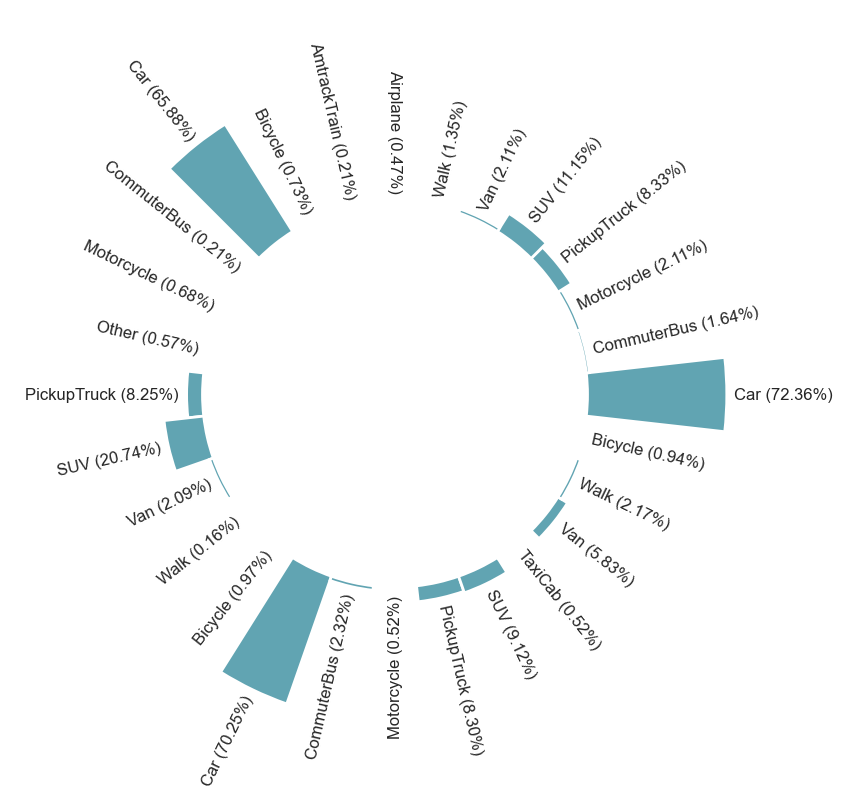

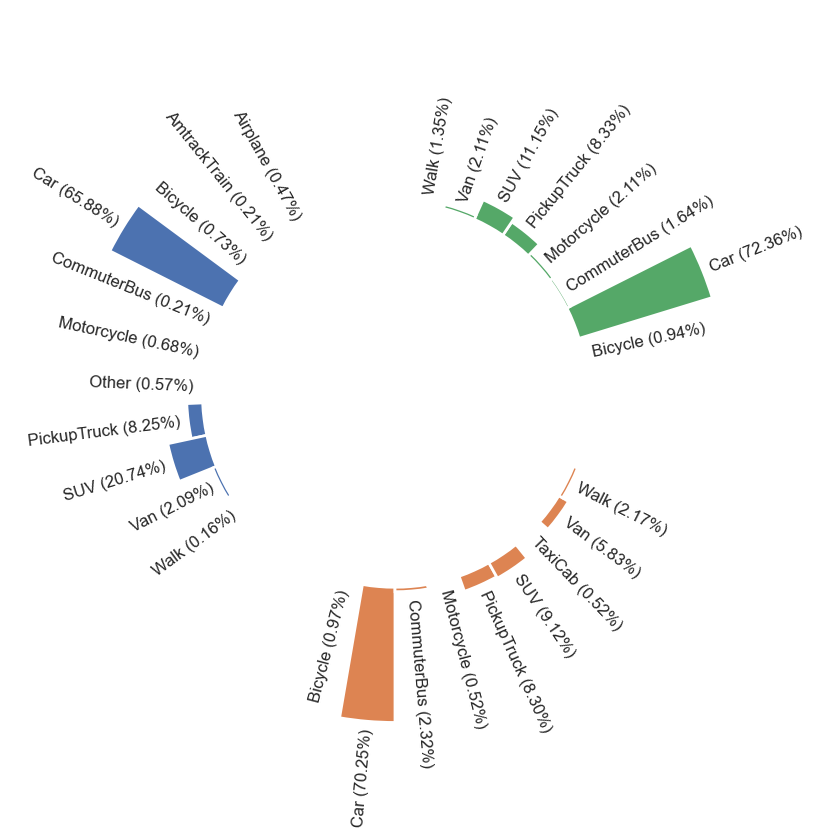

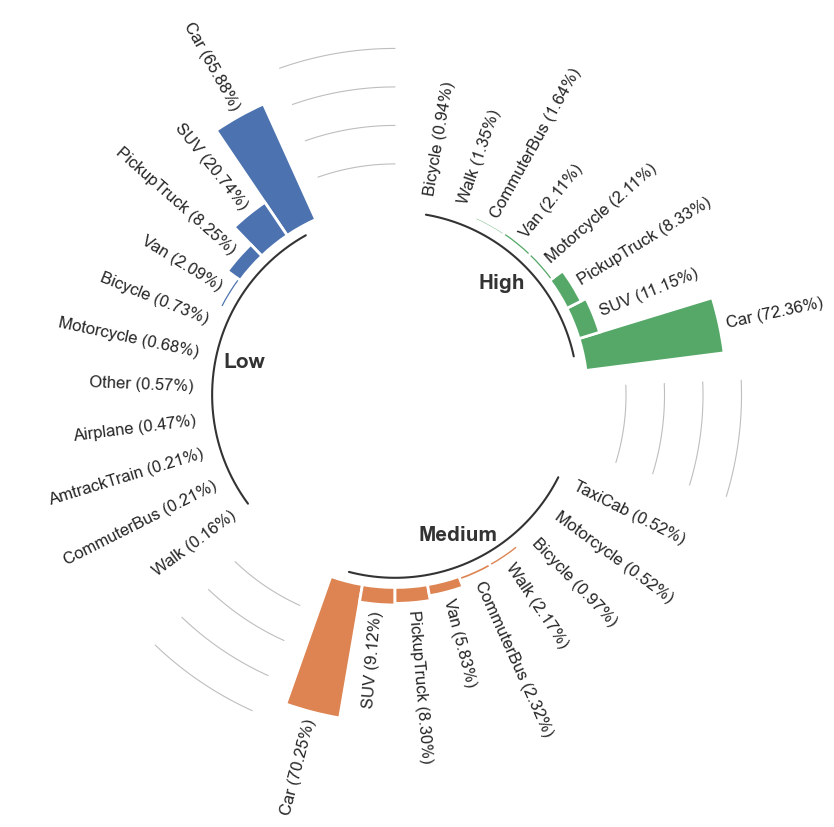

In [63]:
def get_label_rotation(angle, offset):
    # Rotation must be specified in degrees :(
    rotation = np.rad2deg(angle + offset)
    if angle <= np.pi:
        alignment = "right"
        rotation = rotation + 180
    else: 
        alignment = "left"
    return rotation, alignment


def add_labels(angles, values, labels, offset, ax):
    
    # This is the space between the end of the bar and the label
    padding = 4
    
    # Iterate over angles, values, and labels, to add all of them.
    for angle, value, label, in zip(angles, values, labels):
        angle = angle
        
        # Obtain text rotation and alignment
        rotation, alignment = get_label_rotation(angle, offset)

        # And finally add the text
        ax.text(
            x=angle, 
            y=value + padding, 
            s=label, 
            ha=alignment, 
            va="center", 
            rotation=rotation, 
            rotation_mode="anchor"
        ) 

# Reorder the dataframe
df_sorted = (
    df
    .groupby(["group"])
    .apply(lambda x: x.sort_values(["value"], ascending = False))
    .reset_index(drop=True)
)

ANGLES = np.linspace(0, 2 * np.pi, len(df), endpoint=False)
VALUES = df["value"].values
LABELS = df["name"].values

# Determine the width of each bar. 
# The circumference is '2 * pi', so we divide that total width over the number of bars.
WIDTH = 2 * np.pi / len(VALUES)

# Determines where to place the first bar. 
# By default, matplotlib starts at 0 (the first bar is horizontal)
# but here we say we want to start at pi/2 (90 deg)
OFFSET = np.pi / 2

# Initialize Figure and Axis
fig, ax = plt.subplots(figsize=(20, 10), subplot_kw={"projection": "polar"})

# Specify offset
ax.set_theta_offset(OFFSET)

# Set limits for radial (y) axis. The negative lower bound creates the whole in the middle.
ax.set_ylim(-100, 100)

# Remove all spines
ax.set_frame_on(False)

# Remove grid and tick marks
ax.xaxis.grid(False)
ax.yaxis.grid(False)
ax.set_xticks([])
ax.set_yticks([])

# Add bars
ax.bar(
    ANGLES, VALUES, width=WIDTH, linewidth=2,
    color="#61a4b2", edgecolor="white"
)

# Add labels
add_labels(ANGLES, VALUES, LABELS, OFFSET, ax)

# Grab the group values
GROUP = df["group"].values

# Add three empty bars to the end of each group
PAD = 3
ANGLES_N = len(VALUES) + PAD * len(np.unique(GROUP))
ANGLES = np.linspace(0, 2 * np.pi, num=ANGLES_N, endpoint=False)
WIDTH = (2 * np.pi) / len(ANGLES)

# Obtain size of each group
GROUPS_SIZE = [len(i[1]) for i in df.groupby("group")]

# Obtaining the right indexes is now a little more complicated
offset = 0
IDXS = []
for size in GROUPS_SIZE:
    IDXS += list(range(offset + PAD, offset + size + PAD))
    offset += size + PAD

# Same layout as above
fig, ax = plt.subplots(figsize=(20, 10), subplot_kw={"projection": "polar"})

ax.set_theta_offset(OFFSET)
ax.set_ylim(-100, 100)
ax.set_frame_on(False)
ax.xaxis.grid(False)
ax.yaxis.grid(False)
ax.set_xticks([])
ax.set_yticks([])

# Use different colors for each group!
GROUPS_SIZE = [len(i[1]) for i in df.groupby("group")]
COLORS = [f"C{i}" for i, size in enumerate(GROUPS_SIZE) for _ in range(size)]

# And finally add the bars. 
# Note again the `ANGLES[IDXS]` to drop some angles that leave the space between bars.
ax.bar(
    ANGLES[IDXS], VALUES, width=WIDTH, color=COLORS, 
    edgecolor="white", linewidth=2
)

add_labels(ANGLES[IDXS], VALUES, LABELS, OFFSET, ax)

# All this part is like the code above
VALUES = df_sorted["value"].values
LABELS = df_sorted["name"].values
GROUP = df_sorted["group"].values

PAD = 3
ANGLES_N = len(VALUES) + PAD * len(np.unique(GROUP))
ANGLES = np.linspace(0, 2 * np.pi, num=ANGLES_N, endpoint=False)
WIDTH = (2 * np.pi) / len(ANGLES)

GROUPS_SIZE = [len(i[1]) for i in df.groupby("group")]

offset = 0
IDXS = []
for size in GROUPS_SIZE:
    IDXS += list(range(offset + PAD, offset + size + PAD))
    offset += size + PAD

fig, ax = plt.subplots(figsize=(20, 10), subplot_kw={"projection": "polar"})
ax.set_theta_offset(OFFSET)
ax.set_ylim(-100, 100)
ax.set_frame_on(False)
ax.xaxis.grid(False)
ax.yaxis.grid(False)
ax.set_xticks([])
ax.set_yticks([])

GROUPS_SIZE = [len(i[1]) for i in df.groupby("group")]
COLORS = [f"C{i}" for i, size in enumerate(GROUPS_SIZE) for _ in range(size)]

ax.bar(
    ANGLES[IDXS], VALUES, width=WIDTH, color=COLORS, 
    edgecolor="white", linewidth=2
)

add_labels(ANGLES[IDXS], VALUES, LABELS, OFFSET, ax)

offset = 0 
for group, size in zip(["Low", "Medium", "High"], GROUPS_SIZE):
    # Add line below bars
    x1 = np.linspace(ANGLES[offset + PAD], ANGLES[offset + size + PAD - 1], num=50)
    ax.plot(x1, [-5] * 50, color="#333333")
    
    # Add text to indicate group
    ax.text(
        np.mean(x1), -20, group, color="#333333", fontsize=15, 
        fontweight="bold", ha="center", va="center"
    )
    
    # Add reference lines at 20, 40, 60, and 80
    x2 = np.linspace(ANGLES[offset], ANGLES[offset + PAD - 1], num=50)
    ax.plot(x2, [20] * 50, color="#bebebe", lw=0.8)
    ax.plot(x2, [40] * 50, color="#bebebe", lw=0.8)
    ax.plot(x2, [60] * 50, color="#bebebe", lw=0.8)
    ax.plot(x2, [80] * 50, color="#bebebe", lw=0.8)
    
    offset += size + PAD